# 자동차 리콜 분석

- 자동차 결함 리콜 데이터를 분석해서 유의미한 정보를 도출
- 탐색적 데이터 분석을 수행하기 위해 시각화, 데이터 정제, 특성 엔지니어링 실습

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df = pd.read_csv('/content/한국교통안전공단_자동차결함 리콜현황_20201231.csv', encoding='euc-kr')

In [6]:
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [7]:
df.info() # Dtype 확인

# 데이터 타입은 int(정수), float(실수), string(문자열)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


----------

데이터를 처음 받으면 해야 할 작업!

데이터를 처음 받으면(수집하면) 해야 할 작업
- 중복값이 있는지?
- 결측치가 있는지?

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*

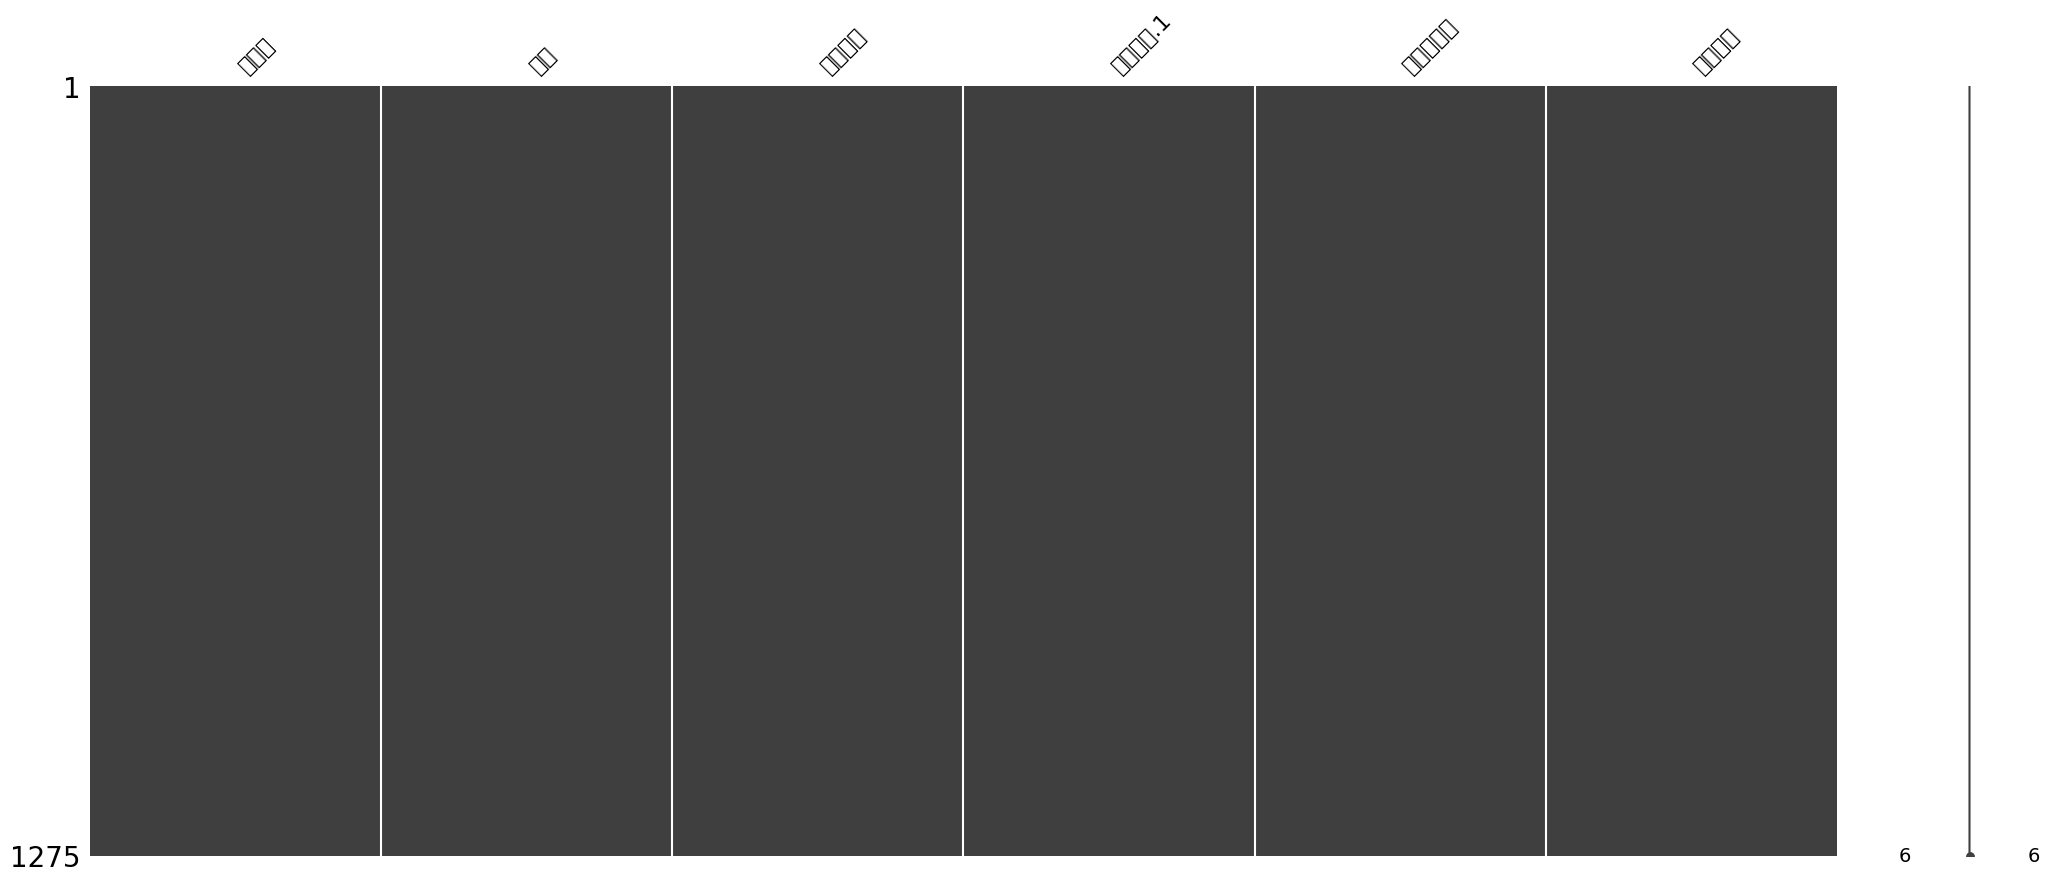

In [8]:
msno.matrix(df) # 결측치 확인

In [9]:
df.isna().sum() # 결측치 수치로 확인

제작자       0
차명        0
생산기간      0
생산기간.1    0
리콜개시일     0
리콜사유      0
dtype: int64

In [10]:
df[df.duplicated(keep = False)]

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


In [11]:
print("Before: ", len(df))

Before:  1275


In [12]:
df = df.drop_duplicates() # 중복값을 제거하는 함수

In [13]:
print("After: ", len(df))

After:  1274


-------

In [14]:
def parse_year(s): # 년도를 추출하는 함수
    return int(s[:4])

def parse_month(s): # 월을 추출하는 함수
    return int(s[5:7])

def parse_day(s): # 일을 추출하는 함수
    return int(s[8:10])

In [15]:
df.loc[:, 'start_year'] = df['생산기간'].apply(parse_year)
df.loc[:, 'start_month'] = df['생산기간'].apply(parse_month)
df.loc[:, 'start_day'] = df['생산기간'].apply(parse_day)

<ipython-input-15-69ab7fa021c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'start_year'] = df['생산기간'].apply(parse_year)
<ipython-input-15-69ab7fa021c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'start_month'] = df['생산기간'].apply(parse_month)
<ipython-input-15-69ab7fa021c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [16]:
df.loc[:, 'end_year'] = df['생산기간.1'].apply(parse_year)
df.loc[:, 'end_month'] = df['생산기간.1'].apply(parse_month)
df.loc[:, 'end_day'] = df['생산기간.1'].apply(parse_day)

<ipython-input-16-0054bce8bc5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'end_year'] = df['생산기간.1'].apply(parse_year)
<ipython-input-16-0054bce8bc5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'end_month'] = df['생산기간.1'].apply(parse_month)
<ipython-input-16-0054bce8bc5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [17]:
df.loc[:, 'recall_year'] = df['리콜개시일'].apply(parse_year)
df.loc[:, 'recall_month'] = df['리콜개시일'].apply(parse_month)
df.loc[:, 'recall_day'] = df['리콜개시일'].apply(parse_day)

<ipython-input-17-6a9425ee59aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'recall_year'] = df['리콜개시일'].apply(parse_year)
<ipython-input-17-6a9425ee59aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'recall_month'] = df['리콜개시일'].apply(parse_month)
<ipython-input-17-6a9425ee59aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [18]:
df = df.drop(columns = ['생산기간', '생산기간.1', '리콜개시일'], axis = 1).rename(columns = {'제작자': 'manufacturer', '차명': 'model', '리콜사유': 'cause'})

In [19]:
df.head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,9,6,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,9,4,2020,1,23


In [20]:
df.recall_year.min(), df.recall_year.max()

(2019, 2020)

In [21]:
df= df[df['recall_year']== 2020] # 2020년 값만 가져오기!

In [22]:
df.recall_year.sort_values(ascending = True)

0       2020
857     2020
856     2020
855     2020
854     2020
        ... 
430     2020
429     2020
428     2020
435     2020
1274    2020
Name: recall_year, Length: 1263, dtype: int64

-------

In [23]:
temp = pd.DataFrame(df.groupby('manufacturer')['model'].count().sort_values(ascending = False)).rename(columns = {'model': 'count'})

In [24]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

<ipython-input-25-a1f66fce2f1f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'manufacturer', palette = 'Set2', order = temp.index)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50656 (\N{HANGUL SYLLABLE EM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE B

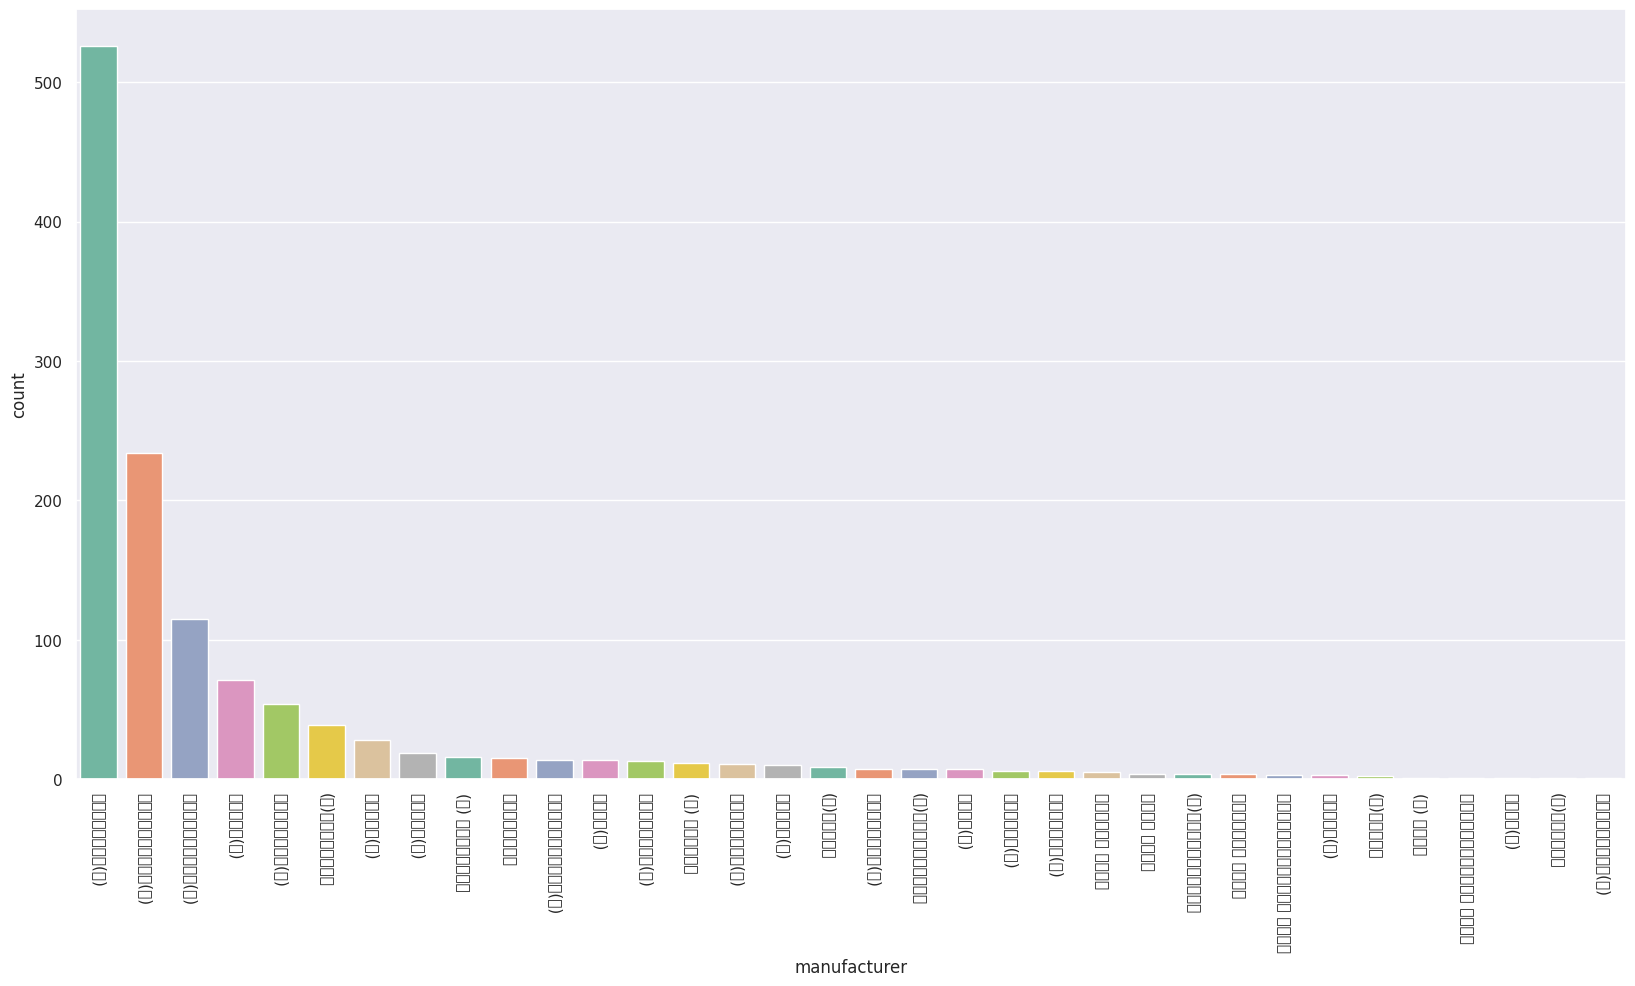

In [25]:
plt.figure(figsize = (20, 10))
sns.set(rc={'axes.unicode_minus': False}
        , style='darkgrid')

ax = sns.countplot(data = df, x = 'manufacturer', palette = 'Set2', order = temp.index)
plt.xticks(rotation = 270)
plt.show()

# 막대 그래프
- 기본적으로 X축에 범주형 데이터를 받습니다.
- 세로축에 값을 받습니다.
- 최대, 최소 및 상대적인 값 비교에 용이합니다
-----------

월별 리콜 건수 분포를 막대 그래프로 확인

In [30]:
pd.DataFrame(df.groupby('recall_month')['start_year'].count().sort_values(ascending = False))

,start_year
recall_month,
8,221
10,161
6,155
12,116
4,114
3,108
2,107
9,72
5,68
